<h1 style="text-align: center">Happiness Prediction</h1>

In [7]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

pd.reset_option("display.max_columns")
pd.reset_option("display.max_rows")

In [8]:
df = pd.read_csv('Somerville_happiness.csv', sep=',', header=0)
df = df[df.year == 2021] # Only data from 2011 
df.head()
df[['Annual household income', 'Housing satisfaction']]


,Annual household income,Housing satisfaction
9251,124999.500000,10.0
9252,87499.500000,9.0
9253,87499.500000,6.0
9254,62499.500000,3.0
9255,62499.500000,8.0
...,...,...
10511,62499.500000,9.0
10512,174999.500000,9.0
10513,174999.500000,10.0
10514,210000.000000,8.0


In [9]:
# for i in ['Annual household income', 'Housing satisfaction', 'Living with children under 18', 'Life satisfaction']:
#     plt.figure()
#     plt.hist(df[i].cumsum())
#     plt.show()

In [10]:
# prior_predictive_dist = CmdStanModel(stan_file='model1_ppc.stan')

# # Compilation of code_1.stan and get 1000 samples
# samples = prior_predictive_dist.sample(fixed_param=True, 
#                                        iter_sampling=1000)

# # Creation of pandas dataframe from resulting draws
# df = samples.draws_pd()
# display(df)

# # Compute ratio of allergic reactions for each sample
# ratio = df['y'] / df['N']

# predictors = df[['Annual household income', 'Housing satisfaction']].head(100).to_numpy()
# print(df['Housing satisfaction'].unique())
# print(predictors)
# predictors = predictors/predictors.max(axis=0)
# # predictors = predictors-predictors.mean(axis=0)
# target = df['Life satisfaction'].head(100).to_numpy().astype('int')
# print(target)
# print(predictors)
# xd = CmdStanModel(stan_file='test.stan')

# d = {'K' : 10,
#      'N' : 100,
#      'J' : 2,
#      'y' : target,
#      'X' : predictors}

# # Compilation of code_1.stan and get 1000 samples
# samples = xd.sample(data=d, fixed_param=True, iter_sampling=1000, iter_warmup=1000, chains=1)
# print(samples.diagnose())

# # Creation of pandas dataframe from resulting draws
# df_old = samples.draws_pd()
# display(df_old)

# Compute ratio of allergic reactions for each sample
# ratio = df['y'] / df['N']

# prior = CmdStanModel(stan_file='test3.stan')
# samples = prior.sample(fixed_param=True, 
#                                        iter_sampling=1000)

# df = samples.draws_pd()
# df.head(10)

In [11]:

# df_old.hist(column='happy[93]')
# plt.show()
# plt.figure()
# plt.hist()
# plt.show()

In [12]:


# predictors = predictors/predictors.max(axis=0)
# predictors = predictors-predictors.mean(axis=0)
target = df['Life satisfaction'].head(100).to_numpy().astype('int')


xd = CmdStanModel(stan_file='test2.stan')

income = df['Annual household income'].head(100).to_numpy().astype('int')
income = (income/income.std(axis=0))
income = income-income.mean(axis=0)

print(income)
d = {'N' : 100,
     'K' : 10,
     'y' : target,
     'income' : income,
     'satisfaction' : df['Housing satisfaction'].head(100).to_numpy().astype('int'),
     'child' : df['Living with children under 18'].head(100).to_numpy().astype('int')}

# Compilation of code_1.stan and get 1000 samples
samples = xd.sample(data=d, iter_sampling=1000, iter_warmup=1000, chains=4)
print(samples.diagnose())

# Creation of pandas dataframe from resulting draws
df_res = samples.draws_pd()
display(df_res)

# Compute ratio of allergic reactions for each sample
# ratio = df['y'] / df['N']

INFO:cmdstanpy:compiling stan file /home/Final project/test2.stan to exe file /home/Final project/test2


INFO:cmdstanpy:compiled model executable: /home/Final project/test2
--- Translating Stan model to C++ code ---
bin/stanc  --o=/tmp/tmpmtep7jny/tmpjkgeywgs.hpp /tmp/tmpmtep7jny/tmpjkgeywgs.stan
Warning in '/tmp/tmpmtep7jny/tmpjkgeywgs.stan', line 6, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/tmpmtep7jny/tmpjkgeywgs.stan', line 9, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/tmpmtep7jny/tmpjkgeywgs.stan', line 12, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 

[ 0.23761586 -0.40423158 -0.40423158 -0.83212986 -0.83212986  0.23761586
  0.23761586  1.09341243 -0.83212986  1.69248715 -0.83212986 -0.83212986
  0.23761586 -0.46278518 -1.81627881 -0.40423158 -1.26002815  1.69248715
 -0.40423158  0.23761586  1.69248715  0.23761586  1.69248715  0.23761586
 -1.26002815 -0.83212986  0.23761586 -0.83212986 -0.46278518 -0.46278518
  1.09341243 -1.26002815 -0.46278518  0.23761586 -1.60234678 -1.81627881
  0.23761586 -0.83212986  1.09341243 -0.83212986  0.23761586  0.23761586
  0.23761586  1.09341243 -0.40423158 -1.26002815 -1.26002815  1.69248715
 -1.26002815  1.69248715 -0.46278518  1.09341243  1.09341243 -0.83212986
  1.09341243  0.23761586  0.23761586 -1.26002815 -0.46278518  1.09341243
  1.09341243  1.69248715 -1.26002815 -1.26002815 -0.83212986 -0.83212986
 -0.46278518  0.23761586 -0.83212986 -0.83212986  0.23761586  1.09341243
 -0.40423158  1.69248715 -0.46278518  1.09341243 -1.60234678  0.23761586
  0.23761586  0.23761586  0.23761586 -0.83212986  0

chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status


chain 1 |███▏      | 00:00 Iteration: 500 / 1000 [ 50%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                      
chain 2 |██████████| 00:00 Sampling completed                      
chain 3 |██████████| 00:00 Sampling completed                      
chain 4 |██████████| 00:00 Sampling completed                      

INFO:cmdstanpy:CmdStan done processing.



Processing csv files: /tmp/tmpqjygl95e/test2-20230708171616_1.csvWarning: non-fatal error reading adaptation data
, /tmp/tmpqjygl95e/test2-20230708171616_2.csvWarning: non-fatal error reading adaptation data
, /tmp/tmpqjygl95e/test2-20230708171616_3.csvWarning: non-fatal error reading adaptation data
, /tmp/tmpqjygl95e/test2-20230708171616_4.csvWarning: non-fatal error reading adaptation data


The following parameters had fewer than 0.001 effective draws per transition:
  c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], beta_income, beta_satisfy[1], beta_satisfy[2], beta_satisfy[3], beta_satisfy[4], beta_satisfy[5], beta_satisfy[6], beta_satisfy[7], beta_satisfy[8], beta_satisfy[9], beta_satisfy[10], beta_child, happy[31], happy[39], happy[42], happy[45], happy[48], happy[50], happy[52], happy[58], happy[59], happy[71], happy[87], happy[89], happy[92]
Such low values indicate that the effective sample size estimators may be biased high and actual performance may be substantially

,lp__,accept_stat__,c[1],c[2],c[3],c[4],c[5],c[6],c[7],c[8],...,happy[91],happy[92],happy[93],happy[94],happy[95],happy[96],happy[97],happy[98],happy[99],happy[100]
0,0.0,0.0,-0.849292,5.741350,7.06413,7.92568,13.49530,13.94290,14.57660,15.09930,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0
1,0.0,0.0,-0.849292,5.741350,7.06413,7.92568,13.49530,13.94290,14.57660,15.09930,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0
2,0.0,0.0,-0.849292,5.741350,7.06413,7.92568,13.49530,13.94290,14.57660,15.09930,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0
3,0.0,0.0,-0.849292,5.741350,7.06413,7.92568,13.49530,13.94290,14.57660,15.09930,...,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0
4,0.0,0.0,-0.849292,5.741350,7.06413,7.92568,13.49530,13.94290,14.57660,15.09930,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,0.0,-0.557746,-0.334489,1.54092,2.22440,2.85775,3.87543,4.03769,5.23741,...,1.0,3.0,1.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0
3996,0.0,0.0,-0.557746,-0.334489,1.54092,2.22440,2.85775,3.87543,4.03769,5.23741,...,1.0,3.0,3.0,3.0,1.0,5.0,1.0,1.0,1.0,3.0
3997,0.0,0.0,-0.557746,-0.334489,1.54092,2.22440,2.85775,3.87543,4.03769,5.23741,...,1.0,3.0,1.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0
3998,0.0,0.0,-0.557746,-0.334489,1.54092,2.22440,2.85775,3.87543,4.03769,5.23741,...,3.0,4.0,1.0,1.0,1.0,5.0,1.0,3.0,1.0,1.0


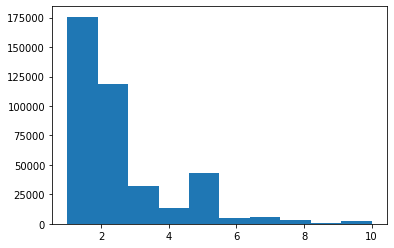

,lp__,accept_stat__,c[1],c[2],c[3],c[4],c[5],c[6],c[7],c[8],c[9],beta_income,beta_satisfy[1],beta_satisfy[2],beta_satisfy[3],beta_satisfy[4],beta_satisfy[5],beta_satisfy[6],beta_satisfy[7],beta_satisfy[8],beta_satisfy[9],beta_satisfy[10],beta_child,happy[1],happy[2],happy[3],happy[4],happy[5],happy[6],happy[7],happy[8],happy[9],happy[10],happy[11],happy[12],happy[13],happy[14],happy[15],happy[16],happy[17],happy[18],happy[19],happy[20],happy[21],happy[22],happy[23],happy[24],happy[25],happy[26],happy[27],happy[28],happy[29],happy[30],happy[31],happy[32],happy[33],happy[34],happy[35],happy[36],happy[37],happy[38],happy[39],happy[40],happy[41],happy[42],happy[43],happy[44],happy[45],happy[46],happy[47],happy[48],happy[49],happy[50],happy[51],happy[52],happy[53],happy[54],happy[55],happy[56],happy[57],happy[58],happy[59],happy[60],happy[61],happy[62],happy[63],happy[64],happy[65],happy[66],happy[67],happy[68],happy[69],happy[70],happy[71],happy[72],happy[73],happy[74],happy[75],happy[76],happy[77],happy[78],happy[79],happy[80],happy[81],happy[82],happy[83],happy[84],happy[85],happy[86],happy[87],happy[88],happy[89],happy[90],happy[91],happy[92],happy[93],happy[94],happy[95],happy[96],happy[97],happy[98],happy[99],happy[100]
0,0.0,0.0,-0.849292,5.741350,7.06413,7.92568,13.49530,13.94290,14.57660,15.09930,17.18720,-0.785525,-1.25145,1.136140,-0.148801,-0.758933,1.381710,1.66882,0.097357,-0.181961,0.673297,-0.223037,0.938742,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0
1,0.0,0.0,-0.849292,5.741350,7.06413,7.92568,13.49530,13.94290,14.57660,15.09930,17.18720,-0.785525,-1.25145,1.136140,-0.148801,-0.758933,1.381710,1.66882,0.097357,-0.181961,0.673297,-0.223037,0.938742,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0
2,0.0,0.0,-0.849292,5.741350,7.06413,7.92568,13.49530,13.94290,14.57660,15.09930,17.18720,-0.785525,-1.25145,1.136140,-0.148801,-0.758933,1.381710,1.66882,0.097357,-0.181961,0.673297,-0.223037,0.938742,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0
3,0.0,0.0,-0.849292,5.741350,7.06413,7.92568,13.49530,13.94290,14.57660,15.09930,17.18720,-0.785525,-1.25145,1.136140,-0.148801,-0.758933,1.381710,1.66882,0.097357,-0.181961,0.673297,-0.223037,0.938742,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0
4,0.0,0.0,-0.849292,5.741350,7.06413,7.92568,13.49530,13.94290,14.57660,15.09930,17.18720,-0.785525,-1.25145,1.136140,-0.148801,-0.758933,1.381710,1.66882,0.097357,-0.181961,0.673297,-0.223037,0.938742,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2

In [13]:
# for col in df_res.columns:
#     print(col)

model1_happy = samples.stan_variable('happy').flatten()



plt.hist(model1_happy)
plt.show()

pd.set_option('display.max_columns', None) 

# pd.set_option("display.max_rows", None)
display(df_res)
# print(df_res.columns)